In [2]:
# dataset source:   https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset

<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  LOAD LIBRARY & DATASET
</div>


In [143]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [144]:
data = pd.read_csv("../datasets/cars.csv")

In [145]:
data.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


In [146]:
data.shape

(762091, 20)

In [432]:
# from IPython.display import display

def unique_columns(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Unique Values": [data[col].nunique() for col in data.columns]
    }
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)
unique_columns(data)

,Column,Unique Values
0,manufacturer,30
1,model,12187
2,year,100
3,mileage,158751
4,engine,6903
5,transmission,1313
6,drivetrain,6
7,fuel_type,36
8,mpg,156
9,accidents_or_damage,2


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

In [149]:
data.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.578169e+04,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,5.110532,4.355788e+04,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  Data Cleaning 
</div>

In [150]:
data.drop_duplicates()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


In [431]:
from IPython.display import display

def unique_columns(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Null Values": [data[col].isnull().sum() for col in data.columns]
    }
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)
unique_columns(data)

,Column,Null Values
0,manufacturer,0
1,model,0
2,year,0
3,mileage,506
4,engine,15050
5,transmission,9904
6,drivetrain,10
7,fuel_type,22927
8,mpg,152260
9,accidents_or_damage,24212


In [152]:
# Define a mapping dictionary
engine_mapping = {
    # Front-wheel Drive variations
    'Front-wheel Drive': 'FWD',
    'Front-Wheel Drive': 'FWD',
    'Front Wheel Drive': 'FWD',
    'Front-Wheel Drive with Limited-Slip Differential': 'FWD',

    # Rear-wheel Drive variations
    'Rear-wheel Drive': 'RWD',
    'Rear-Wheel Drive': 'RWD',
    'Rear Wheel Drive': 'RWD',
    'Rear-Wheel Drive with Limited-Slip Differential': 'RWD',

    # All-wheel Drive variations
    'All-wheel Drive': 'AWD',
    'All-Wheel Drive': 'AWD',
    'All Wheel Drive': 'AWD',
    'All-Wheel Drive with Locking and Limited-Slip Differential': 'AWD',
    'All-Wheel Drive with Locking Differential': 'AWD',

    # Four-wheel Drive (4WD / 4x4) variations
    'Four-wheel Drive': '4WD',
    'Four-Wheel Drive': '4WD',
    'Four Wheel Drive': '4WD',
    'Four-Wheel Drive with Locking and Limited-Slip Differential': '4WD',
    'Four-Wheel Drive with Locking Differential': '4WD',
    '4WD': '4WD',
    '4x4': '4WD',
    '4X4': '4WD',
    '4x2': '2WD',
    '2WD': '2WD',

    # Already short forms — map to themselves (optional but safe)
    'FWD': 'FWD',
    'RWD': 'RWD',
    'AWD': 'AWD',

    # Optional cleanup
    'Unknown': 'Unknown',
    float('nan'): 'Unknown' 
}
data['drivetrain'] = data['drivetrain'].map(engine_mapping)

In [153]:
data['drivetrain'].unique()

array(['FWD', 'Unknown', 'AWD', 'RWD', '4WD', nan, '2WD'], dtype=object)

In [154]:
data = data.drop(columns=['exterior_color','interior_color'],axis =1)

<div style="text-align: center;background-color:#f0e9d5; padding:10px; border-left: 5px solid #4CAF50; font-family: Trebuchet MS; font-size: 20px; color: #333;">
  Data Analysis
</div>

In [155]:
from IPython.display import display

def unique_columns(data):
    """
    Display a table showing the number of unique values for each column in the DataFrame.
    """
    unique_counts = {
        "Column": data.columns,
        "Unique Values": [data[col].nunique() for col in data.columns]
    }
    
    
    result_df = pd.DataFrame(unique_counts)
    display(result_df)


In [158]:
##### please uncomment out this code when you run from start-----------------

def clean_mpg(val):
    try:
        if pd.isna(val):
            return np.nan
            
        parts = val.split('-')
        low = float(parts[0])
        high = float(parts[1])
        
        if low == 0 and high == 0:
            return np.nan
            
        return (low + high) /2
        
    except:
        return np.nan

data['mpg'] = data['mpg'].apply(clean_mpg)

In [160]:
data['mpg'].nunique()

156

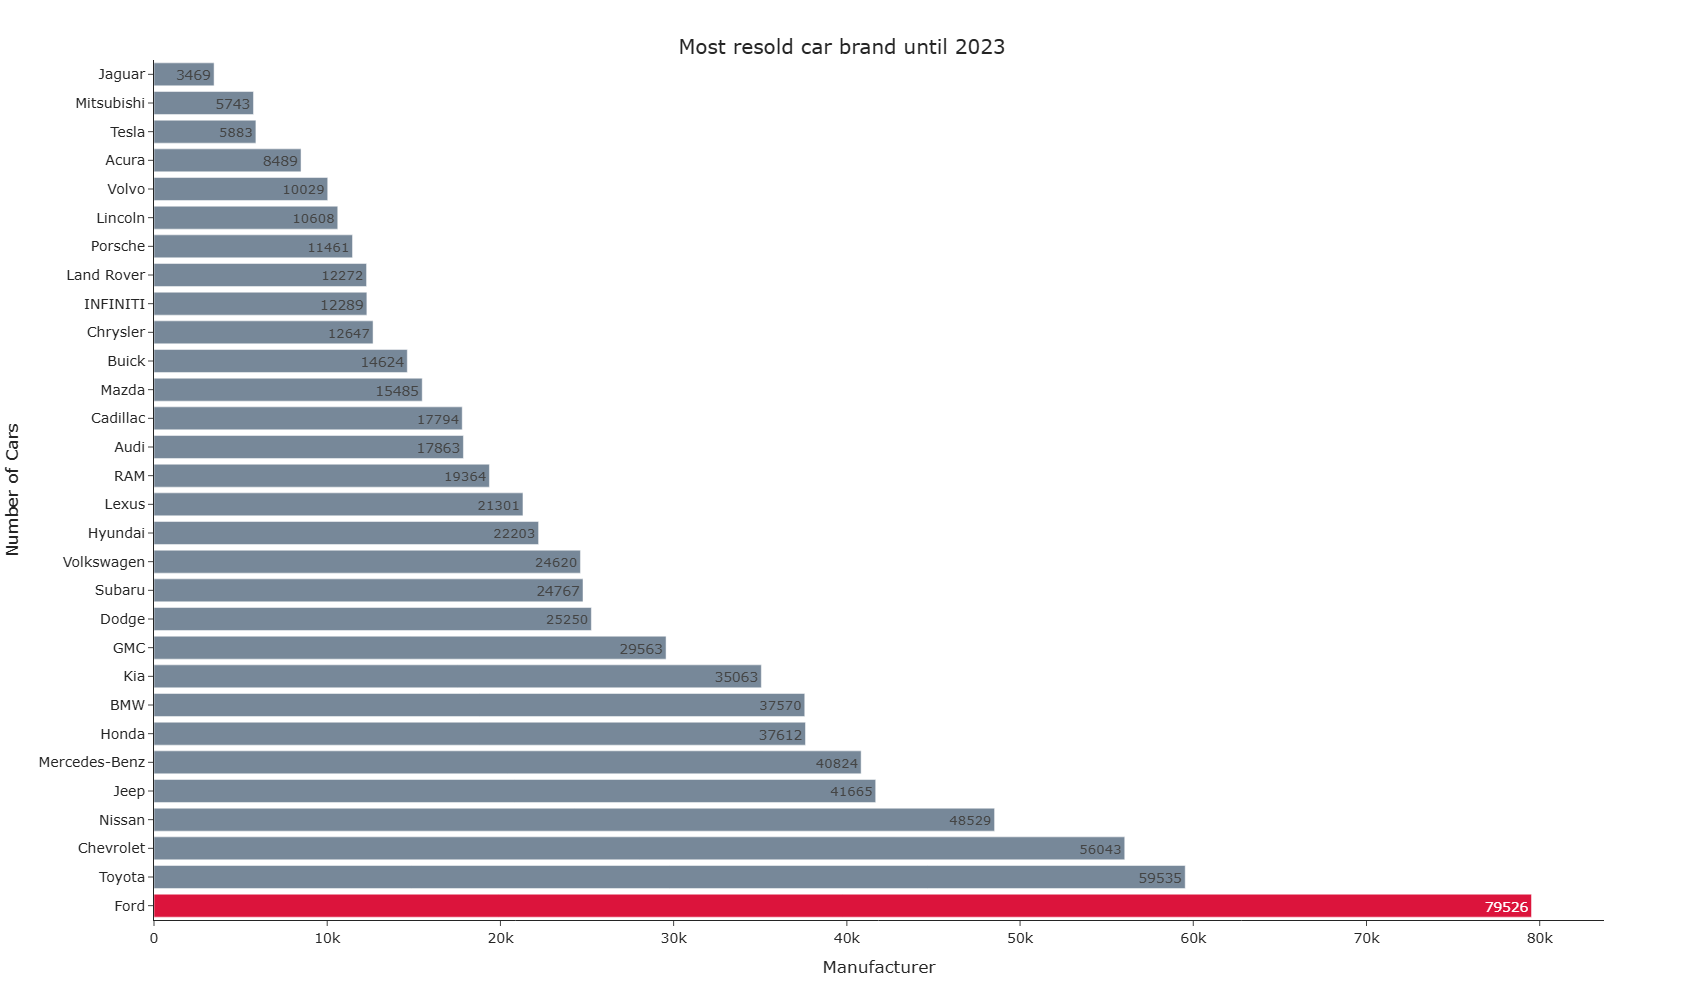

In [403]:
color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(y = data['manufacturer'].value_counts().index, x = data['manufacturer'].value_counts(),
             # color = data['manufacturer'].value_counts().index,
             # orintation='h',
              template = 'simple_white',text = data['manufacturer'].value_counts(),)

fig.update_traces(marker_color=color) 

fig.update_layout(
    xaxis_title="Manufacturer",
    yaxis_title="Number of Cars",
    showlegend = False,
    height=1000,
    width=1400
    ,
    
    font = dict(size = 14),    
    title={
        'text': "Most resold car brand until 2023",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

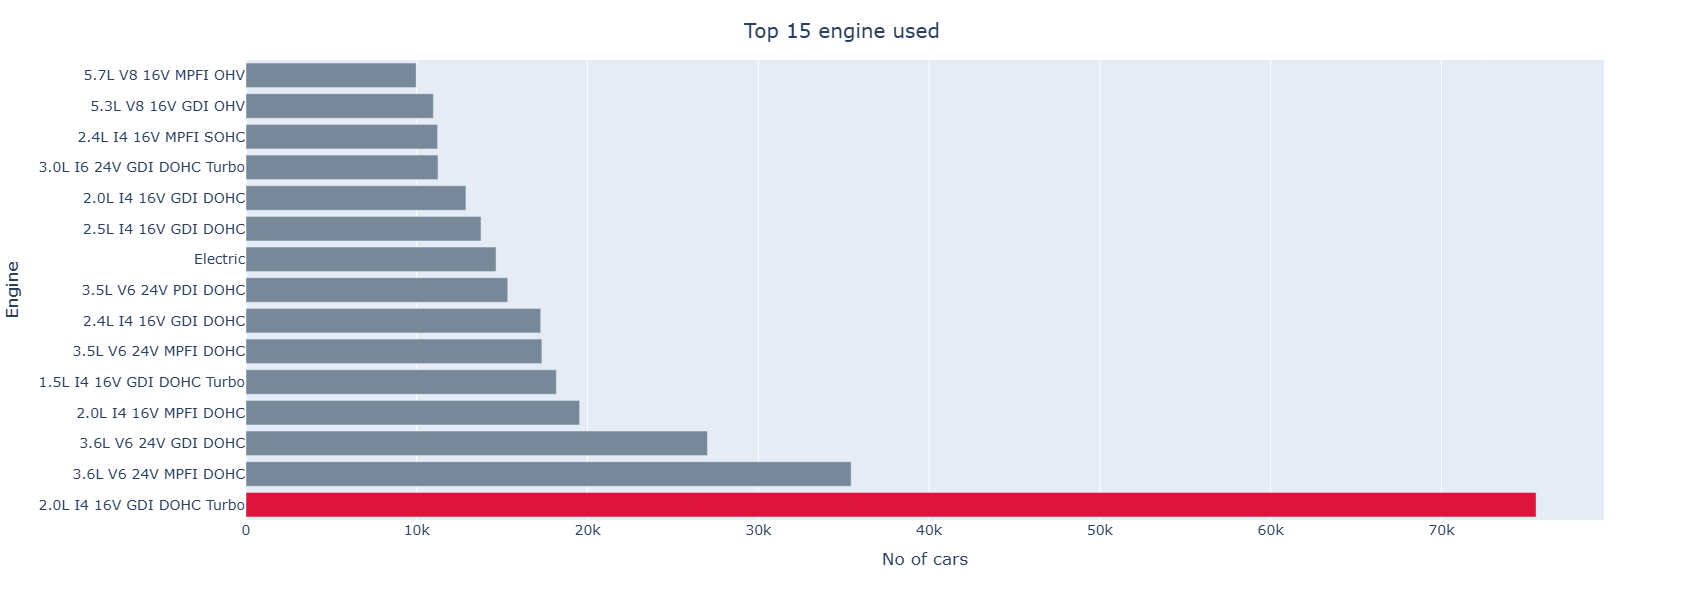

In [406]:
most_used_engin = data['engine'].value_counts().head(15)

color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h',
)
fig.update_traces(marker_color=color) 

fig.update_layout(
    yaxis_title="Engine",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200,
    font = dict(size = 14),    
    title={
        'text': "Top 15 engine used",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

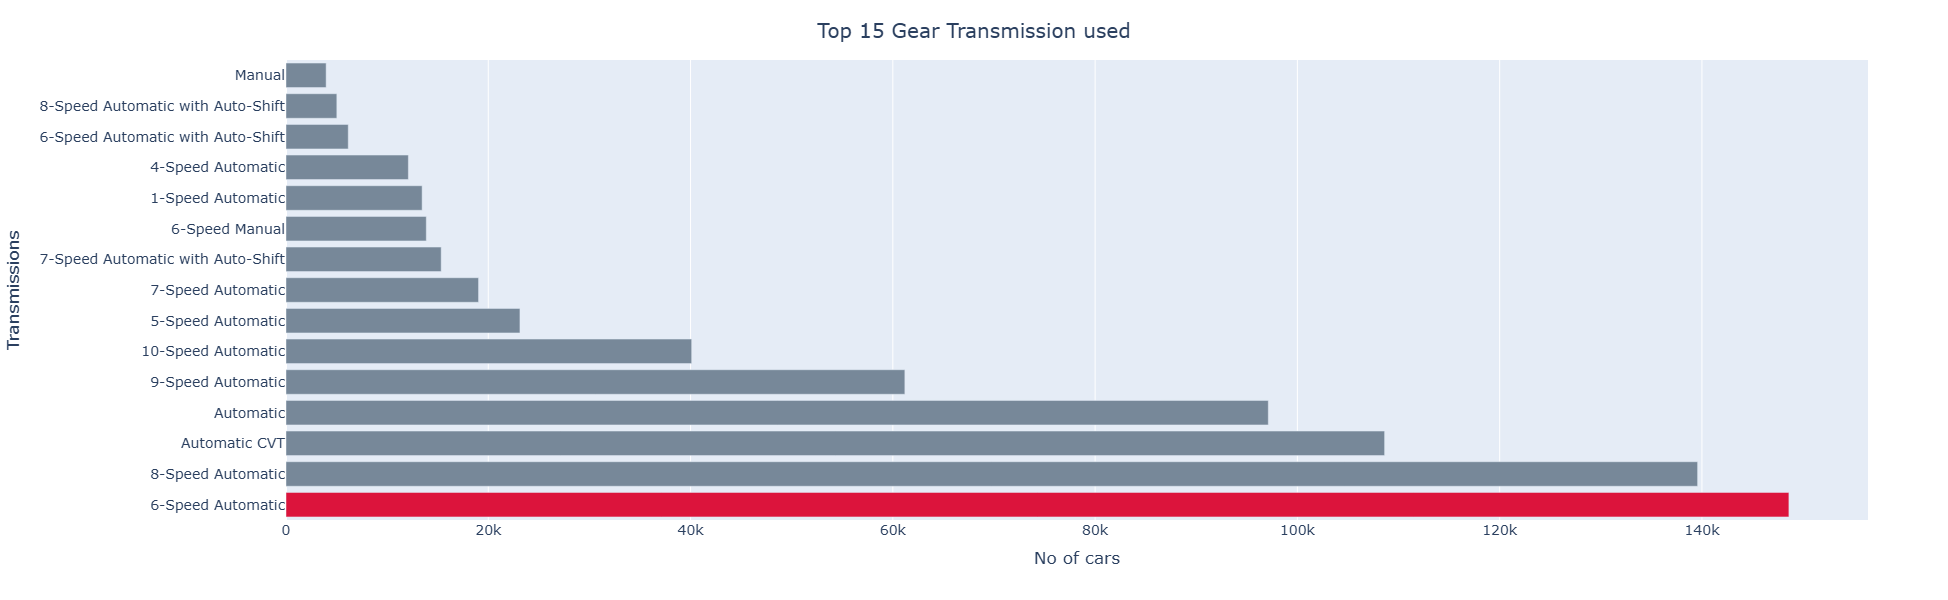

In [407]:
most_used_engin = data['transmission'].value_counts().head(15)
color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_traces(marker_color=color)

fig.update_layout(
    yaxis_title="Transmissions",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200
    ,
    
    font = dict(size = 14),    
    title={
        'text': "Top 15 Gear Transmission used",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

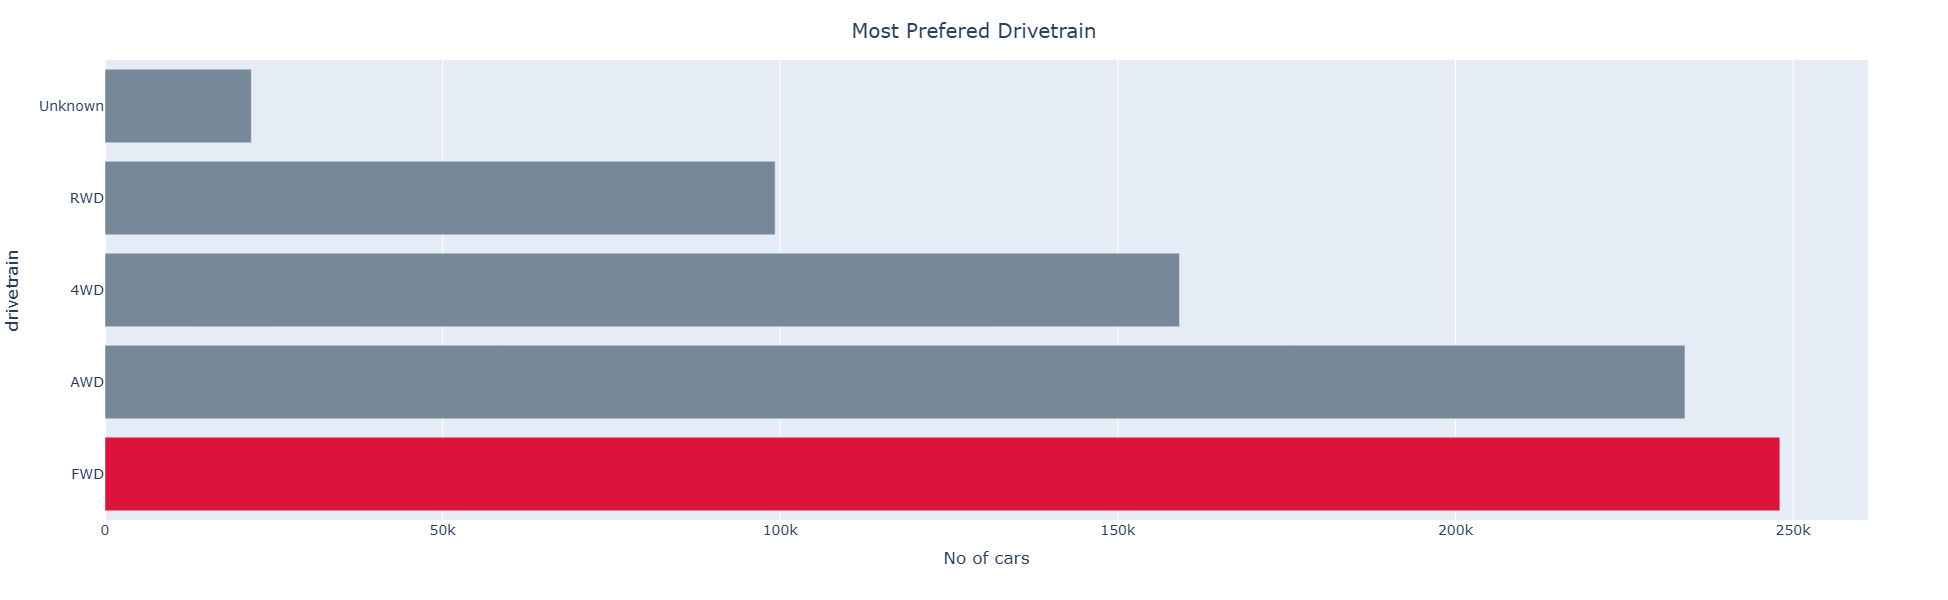

In [408]:
most_used_engin = data['drivetrain'].value_counts().head(5)
color = ['lightslategray']*30
color[0] = 'crimson'

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_traces(marker_color=color)

fig.update_layout(
    yaxis_title="drivetrain",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1200,
    font = dict(size = 14),    
    title={
        'text': "Most Prefered Drivetrain",
        'y':0.96,
        'x':0.5
        }
    )

fig.show()

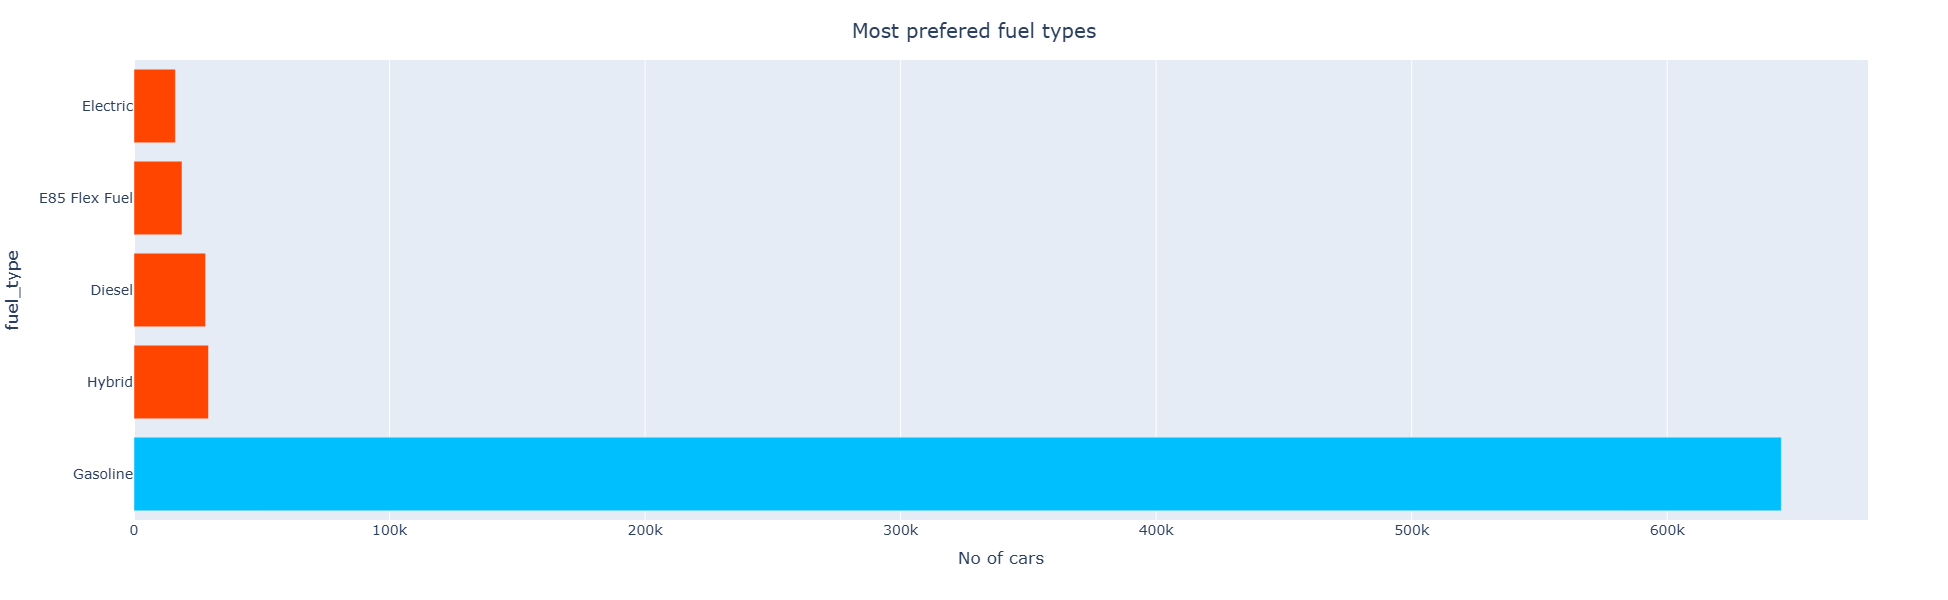

In [424]:
most_used_engin = data['fuel_type'].value_counts().head(5)

color = ['#FF4500']*30
color[0] = '#00BFFF' 

fig = px.bar(
    x=most_used_engin.values,       
    y=most_used_engin.index,
    orientation='h')

fig.update_traces(marker_color=color)
fig.update_layout(
    yaxis_title="fuel_type",
    xaxis_title="No of cars",
    showlegend = False,
    height=600,
    width=1300,
    font = dict(size = 14),    
    title={
        'text': "Most prefered fuel types",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

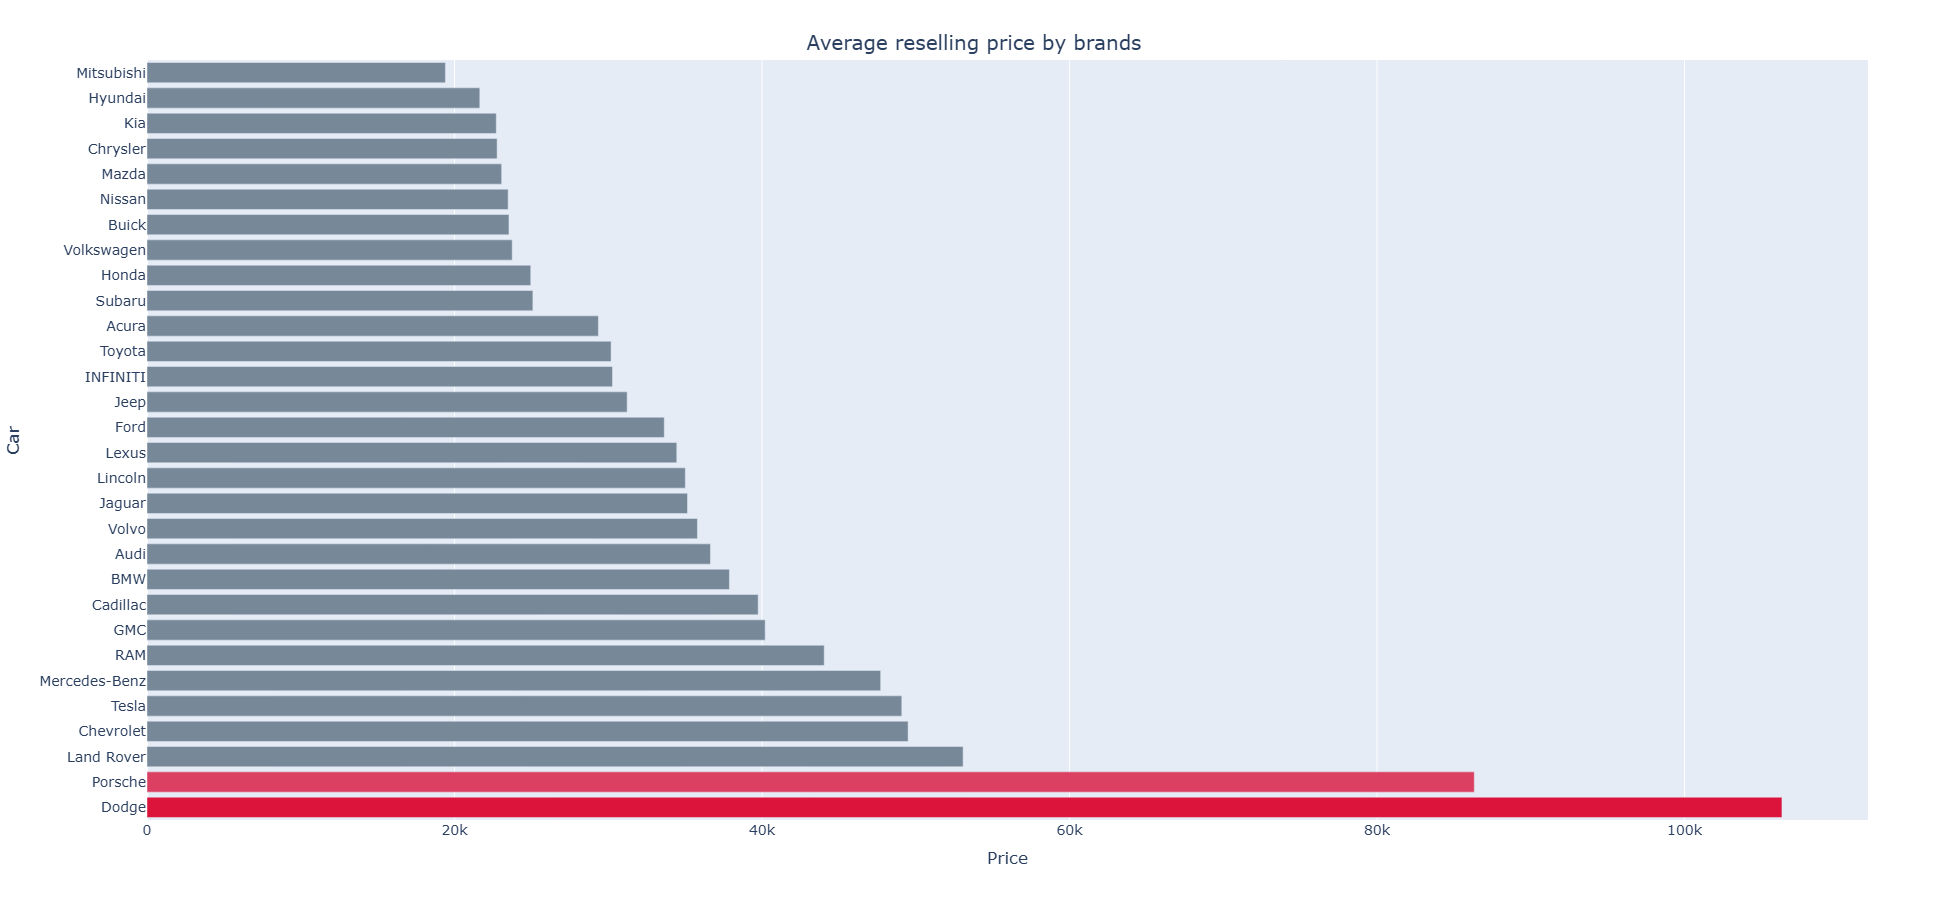

In [430]:
top_brand = data.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
color = ['lightslategray']*30
color[1] = '#db4062'
color[0] = 'crimson'

fig = px.bar(
    x=top_brand.values,       
    y=top_brand.index,
    orientation='h')
fig.update_traces(marker_color=color)

fig.update_layout(
    yaxis_title="Car",
    xaxis_title="Price",
    showlegend = False,
    height=900,
    width=1300,
    font = dict(size = 14),    
    title={
        'text': "Average reselling price by brands",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

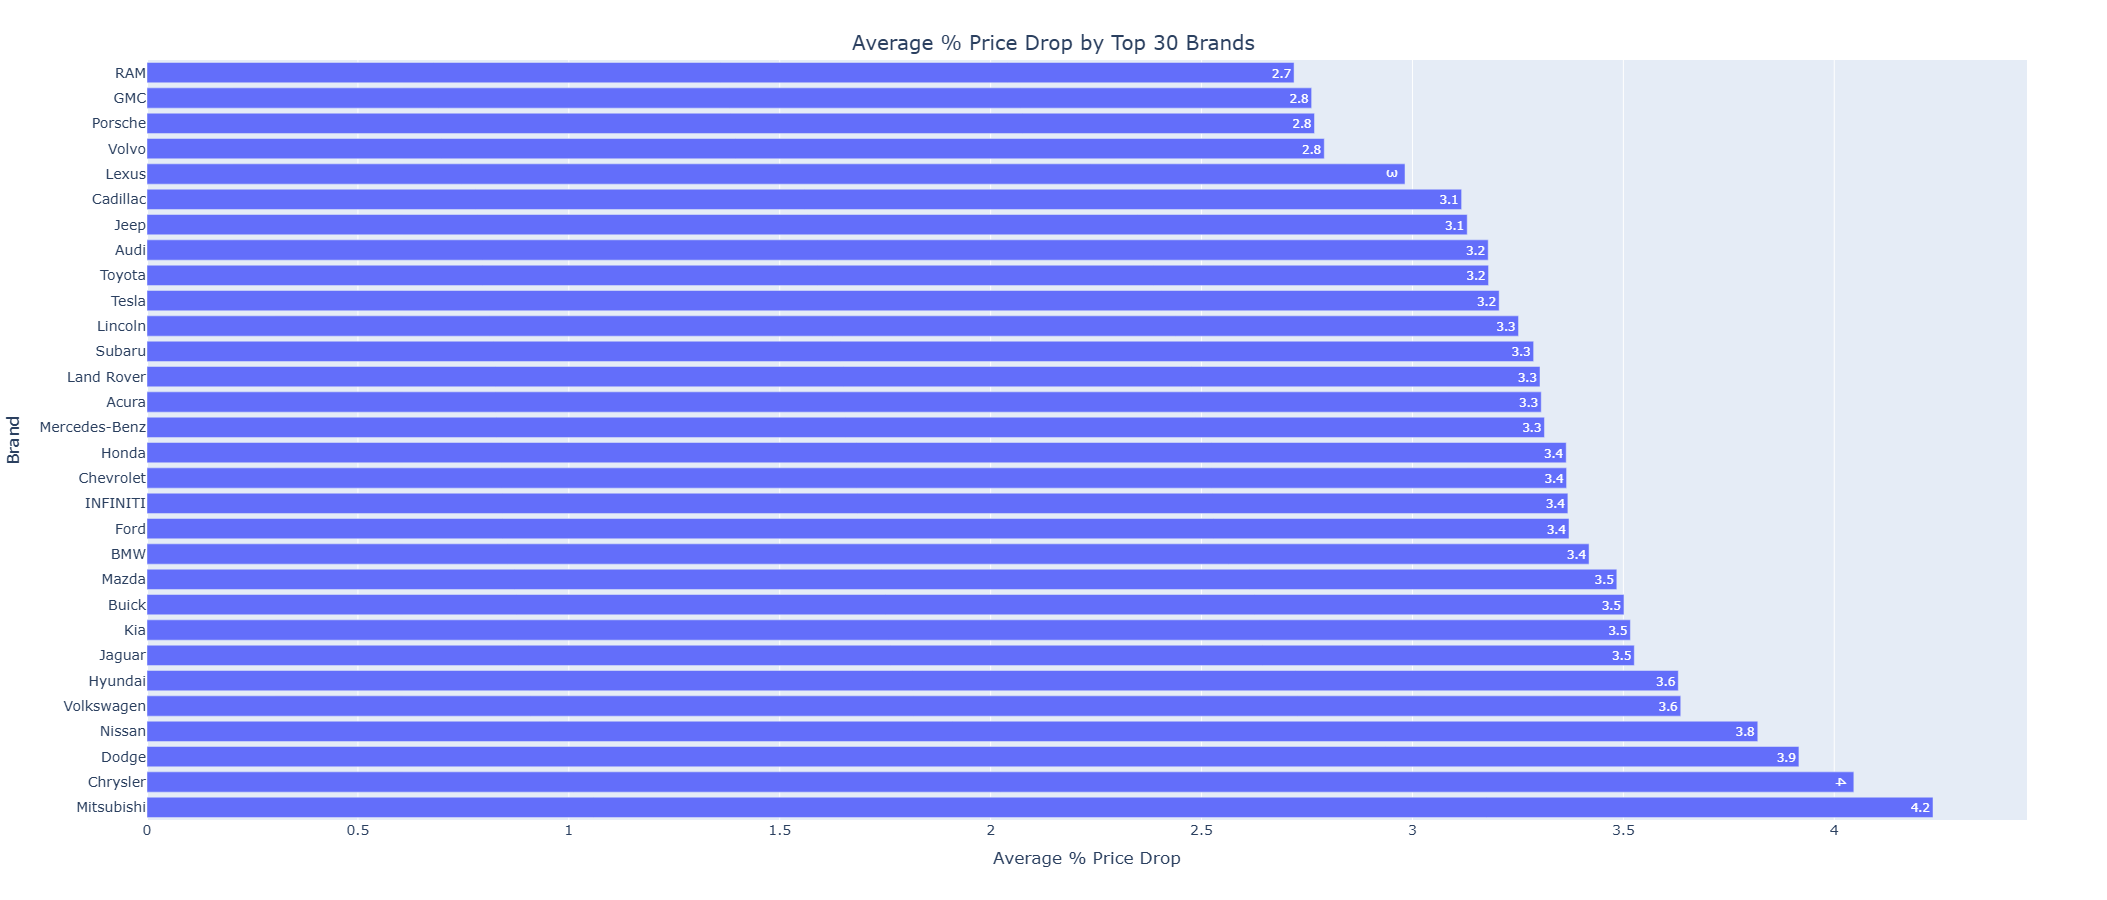

In [33]:
data['price_drop_pct'] = (data['price_drop'] / (data['price'] + data['price_drop'])) * 100

avg_price_drop_by_brand = data.groupby('manufacturer')['price_drop_pct'].mean().sort_values(ascending=False).head(30)

color[0] = 

fig = px.bar(
    x=avg_price_drop_by_brand.values,
    y=avg_price_drop_by_brand.index,
    orientation='h',
    text = avg_price_drop_by_brand.values.round(1)
)

fig.update_layout(
    yaxis_title="Brand",
    xaxis_title="Average % Price Drop",
    showlegend=False,
    height=900,
    width=1400,
    font=dict(size=14),
    title={
        'text': "Average % Price Drop by Top 30 Brands",
        'y': 0.96,
        'x': 0.5
    }
)
fig.show()

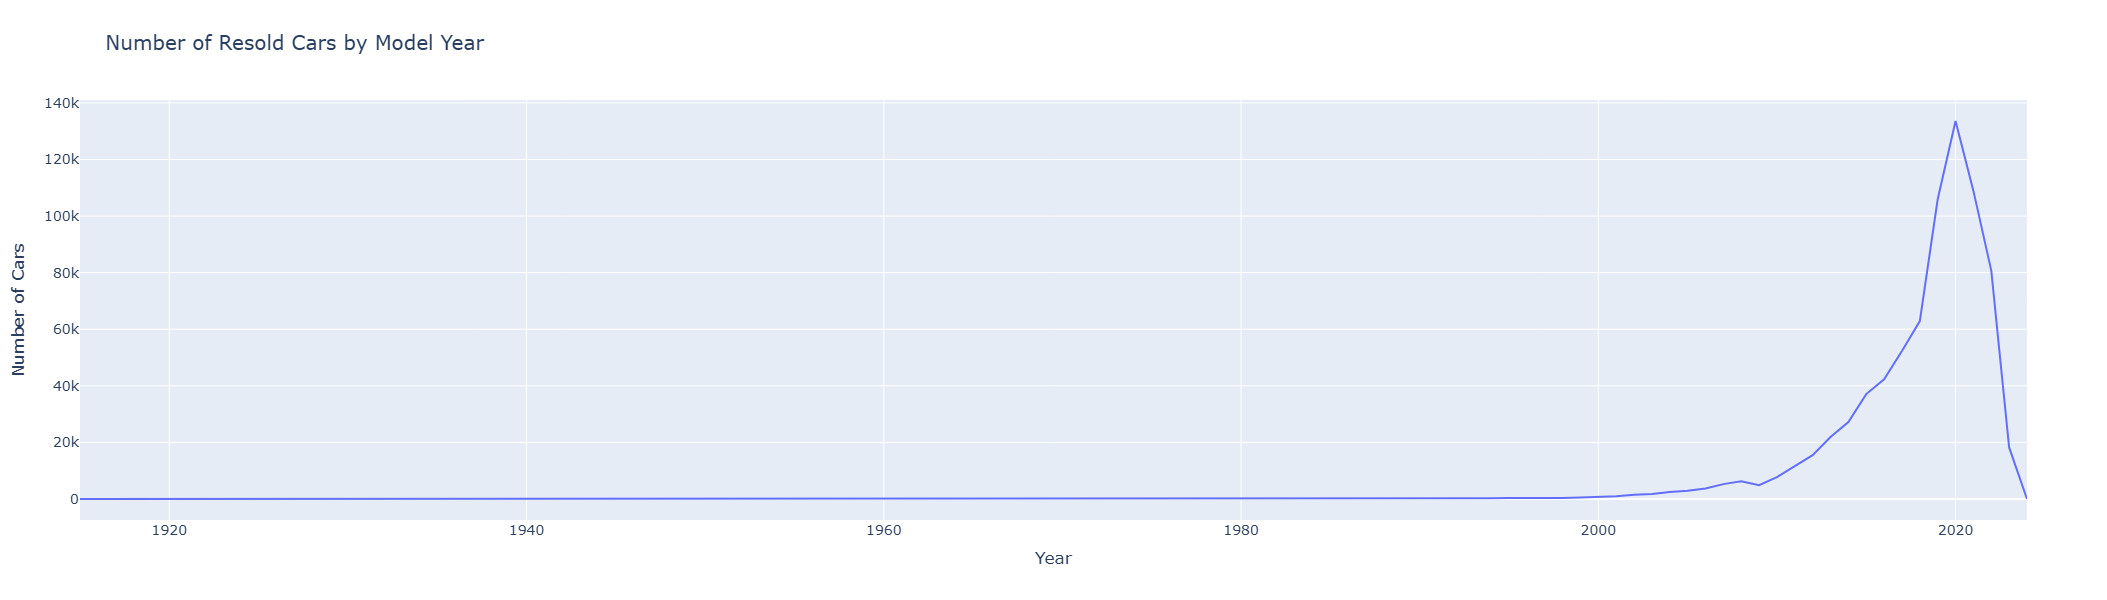

In [34]:
cars_per_year = data['year'].value_counts().sort_index()

import plotly.express as px

fig = px.line(
    x=cars_per_year.index,
    y=cars_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Cars'},
    title='Number of Resold Cars by Model Year'
)

fig.update_layout(
    height=600,
    width=1200,
    font=dict(size=14)
)

fig.show()


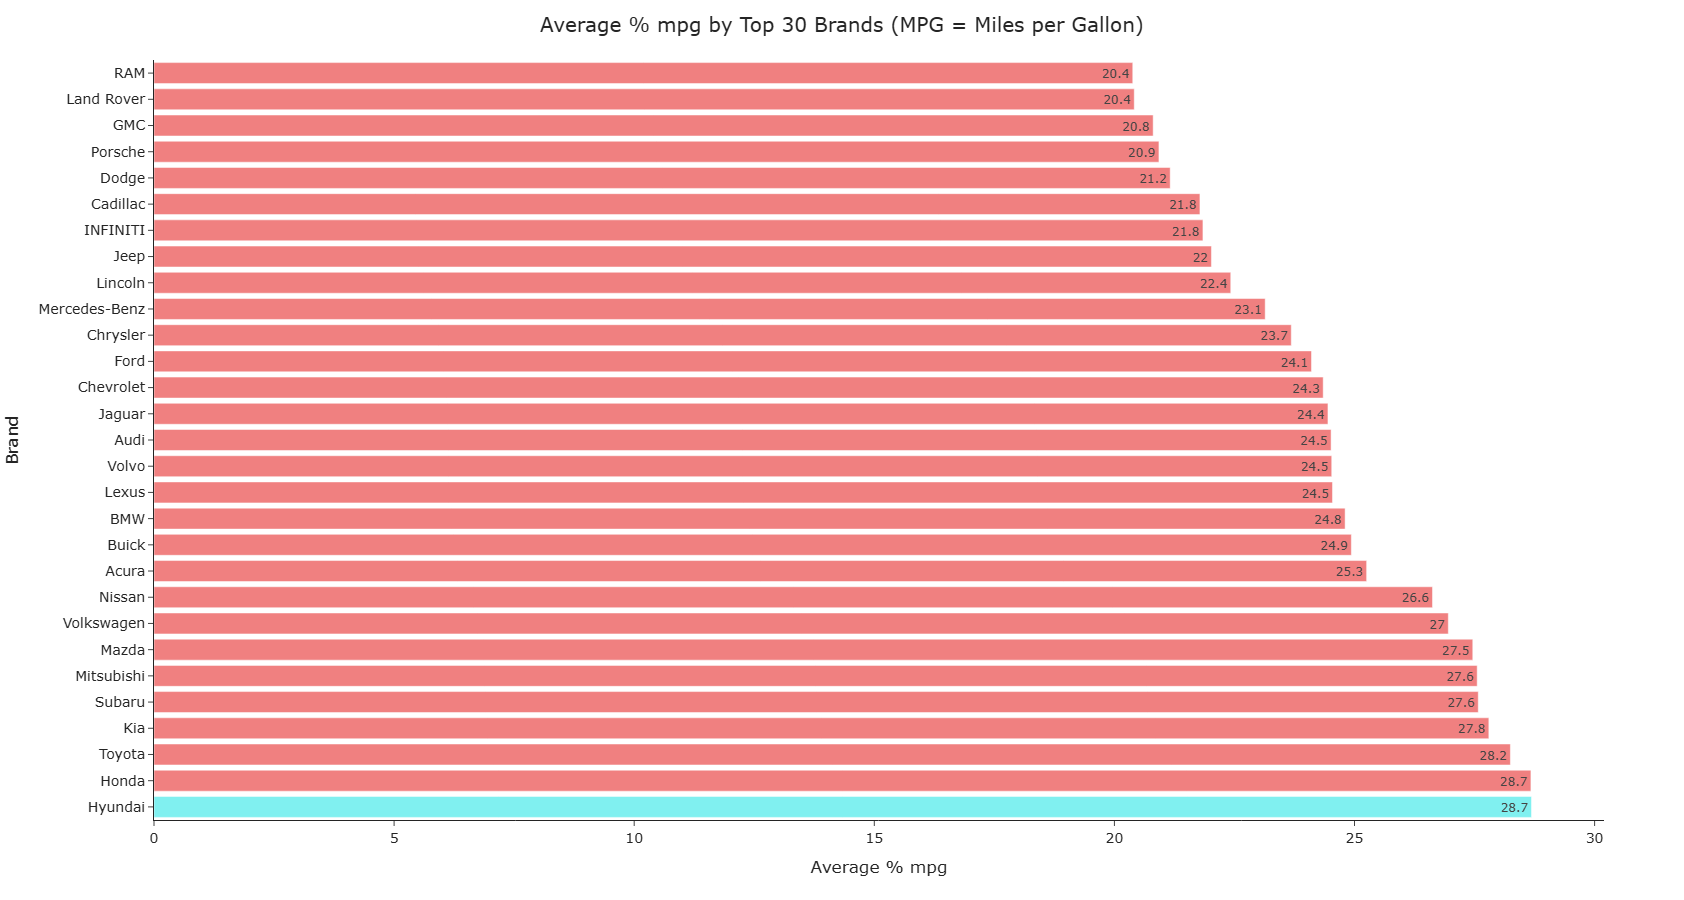

In [394]:
mpg_of_brand = data.groupby('manufacturer')['mpg'].mean().sort_values(ascending=False).head(29)

color = ['#f08080']*30
color[0] = '#80f0f0'

fig = px.bar(
    x=mpg_of_brand.values,
    y=mpg_of_brand.index,
    orientation='h',
    text = mpg_of_brand.values.round(1),
    template="simple_white"
)

fig.update_layout(
    yaxis_title="Brand",
    xaxis_title="Average % mpg",
    showlegend=False,
    height=900,
    width=1400,
    font=dict(size=14),
    title={
        'text': "Average % mpg by Top 30 Brands (MPG = Miles per Gallon)",
        'y': 0.98,
        'x': 0.5,
    },
)

fig.update_traces(marker_color=color)   

fig.show()

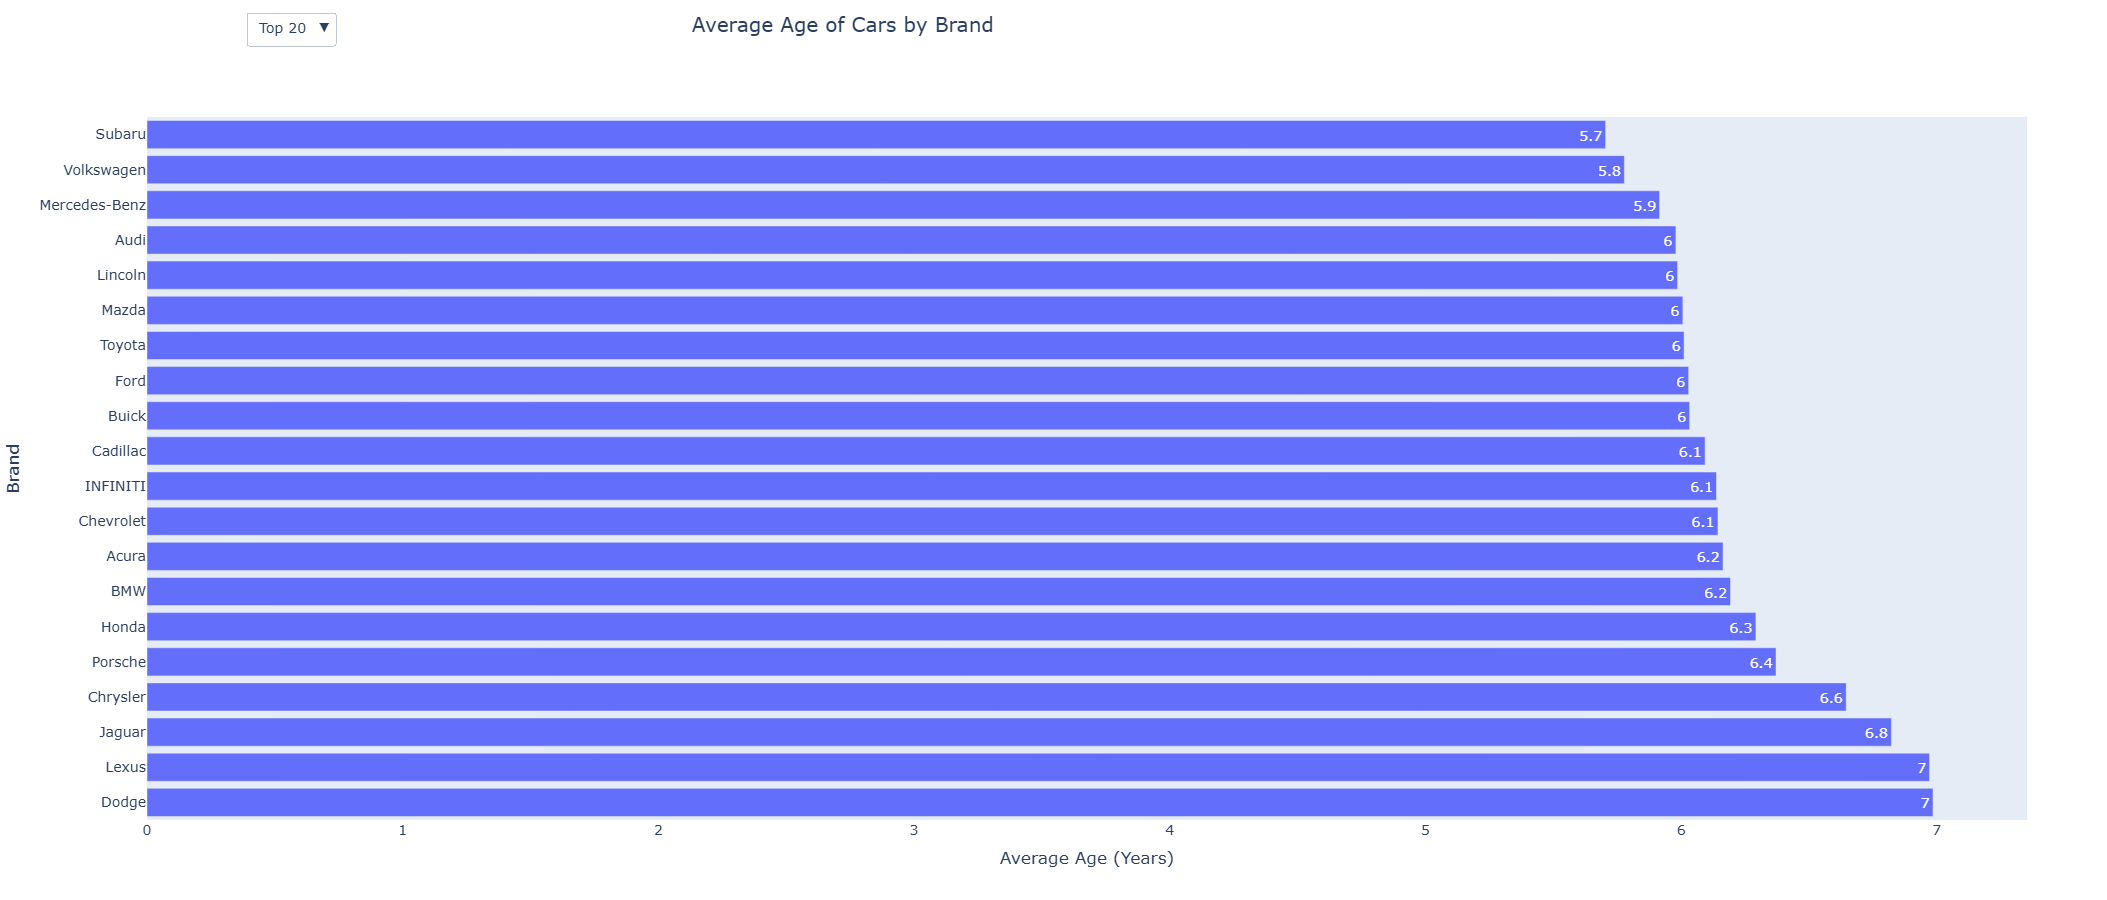

In [169]:
data['age'] = 2024 - data['year']

data_2000 = data[data['year'] > 2000]

avg_age_by_brand = data_2000.groupby('manufacturer')['age'].mean().sort_values(ascending=False)

top_options = [20, 15, 10, 30]
traces = []

for top_n in top_options:
    subset = avg_age_by_brand.head(top_n)
    trace = go.Bar(
        x=subset.values,
        y=subset.index,
        orientation='h',
        name=f'Top {top_n}',
        text=subset.values.round(1),
        # textposition='auto',
        visible=(top_n == 20)  
    )
    traces.append(trace)

buttons = [
    dict(label=f'Top {n}',
         method='update',
         args=[{'visible': [i == idx for i in range(len(top_options))]},
               {'title': f'Average Age of Cars (Top {n} Brands)'}])
    for idx, n in enumerate(top_options)
]

fig = go.Figure(data=traces)

fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        direction="down",
        buttons=buttons,
        y=1.15,
        x=0.1,
        showactive=True
    )],
    yaxis_title="Brand",
    xaxis_title="Average Age (Years)",
    showlegend=False,
    height=900,
    width=1200,
    font=dict(size=14),
    title={
        'text': "Average Age of Cars by Brand",
        'y': 0.98,
        'x': 0.4
    }
)
fig.show()

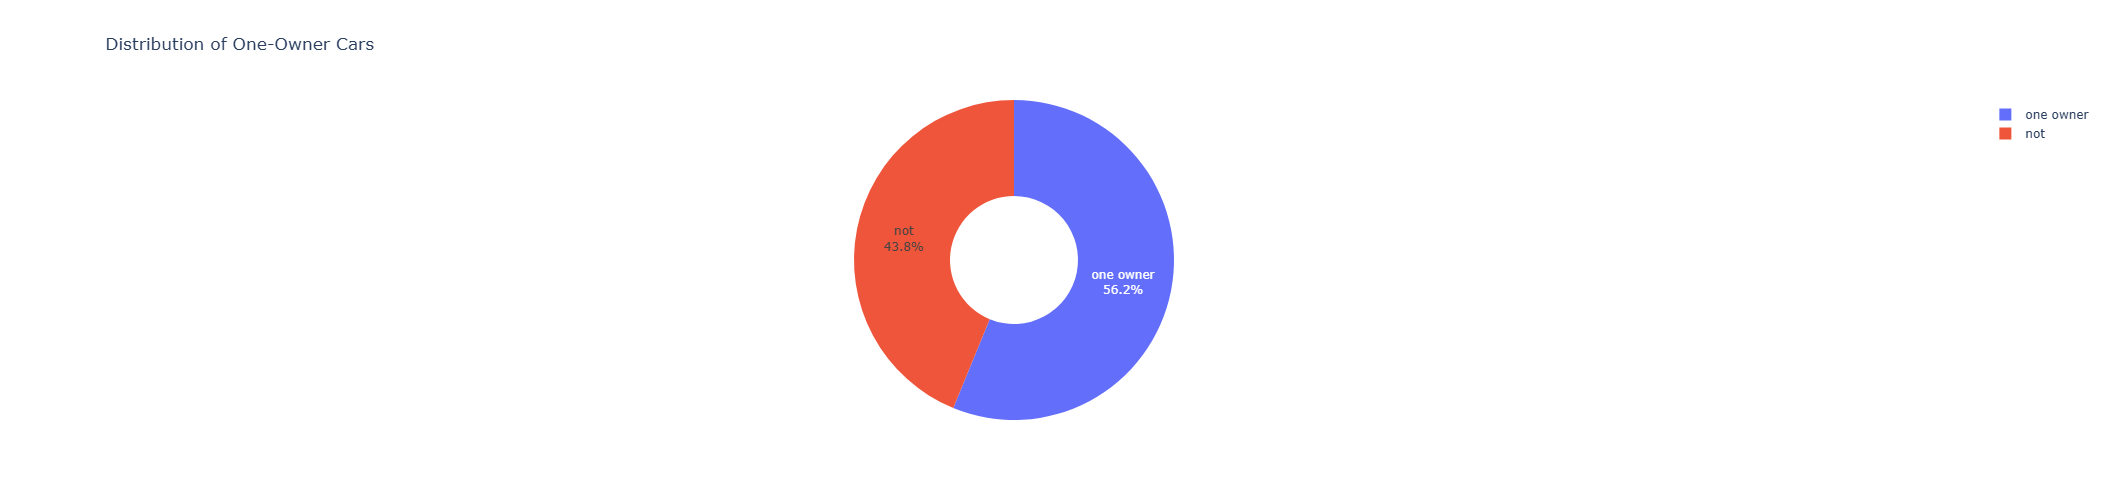

In [216]:
one_owner_ratio = data['one_owner'].value_counts(normalize=True)

label_names = ['one owner','Not']

import plotly.express as px

fig = px.pie(
    names = label_names,
    values=one_owner_ratio.values,
    title='Distribution of One-Owner Cars',
    hole=0.4
)
fig.update_layout(
    height=500,
    width=500,
)
fig.update_traces(textinfo='percent+label')
fig.show()


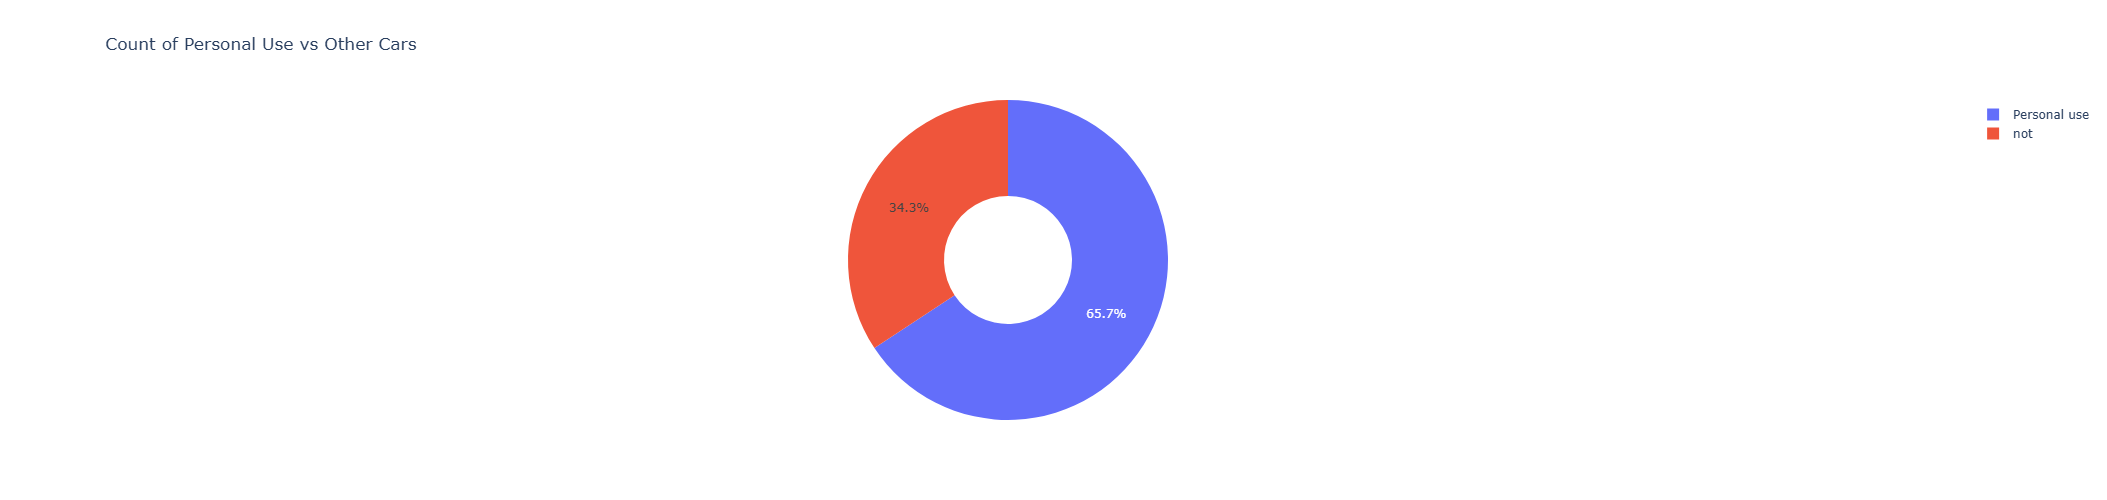

In [91]:
personal_use_ratio = data['personal_use_only'].value_counts(normalize=True)

label_names = ['Personal use','Not']

fig = px.pie(
    names = label_names,
    values=personal_use_ratio.values,
    title='Count of Personal Use vs Other Cars',
    hole=0.4
)
fig.update_layout(
    height = 500,
    width = 500,
)
fig.show()

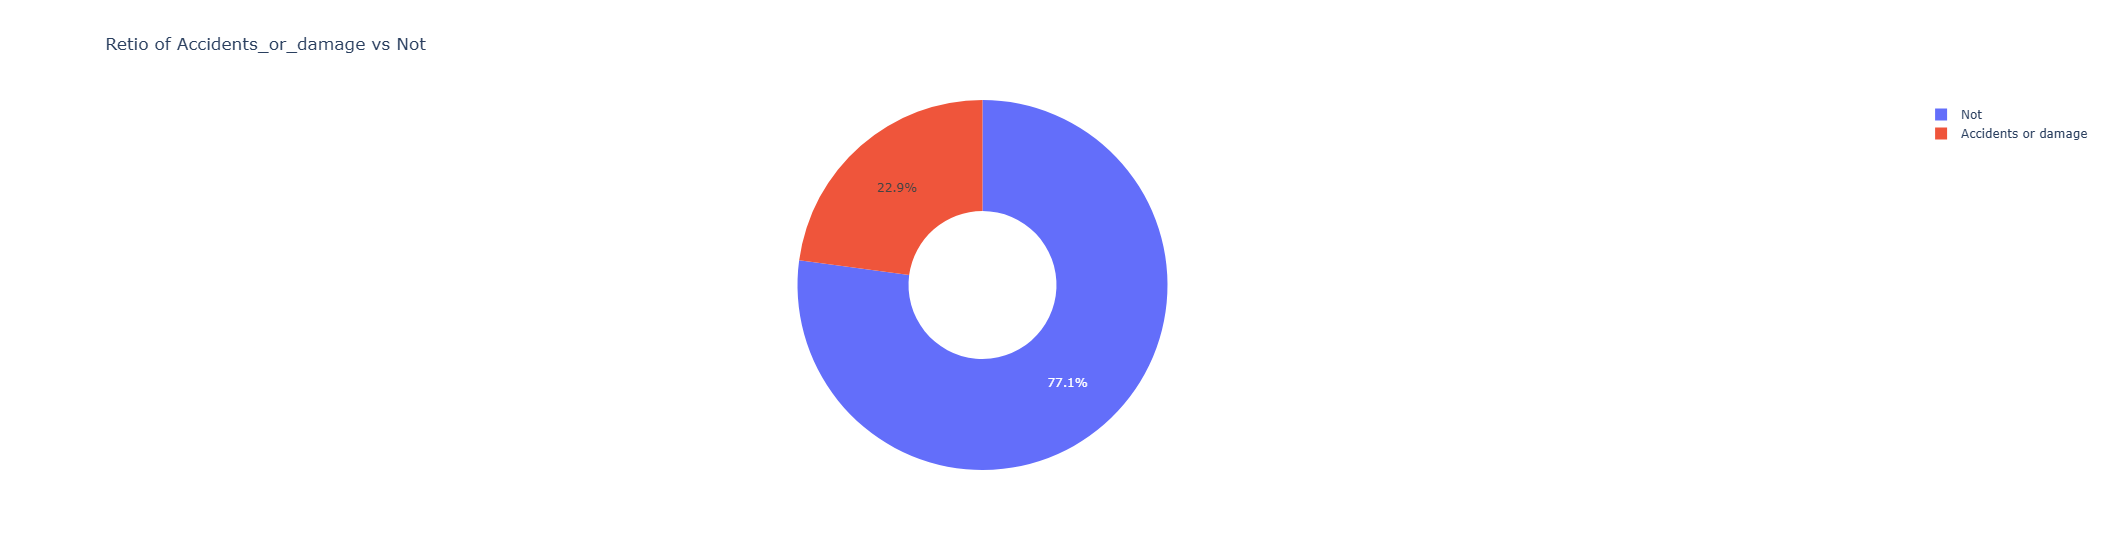

In [168]:
damage_ratio = data['accidents_or_damage'].value_counts(normalize = True)

label_names = ['Not','Accidents or damage']

fig = px.pie(
    names = label_names,
    values=damage_ratio.values,
    title='Retio of Accidents_or_damage vs Not',
    hole=0.4
)
fig.update_layout(
    height = 550,
    width = 550,
)
fig.show()

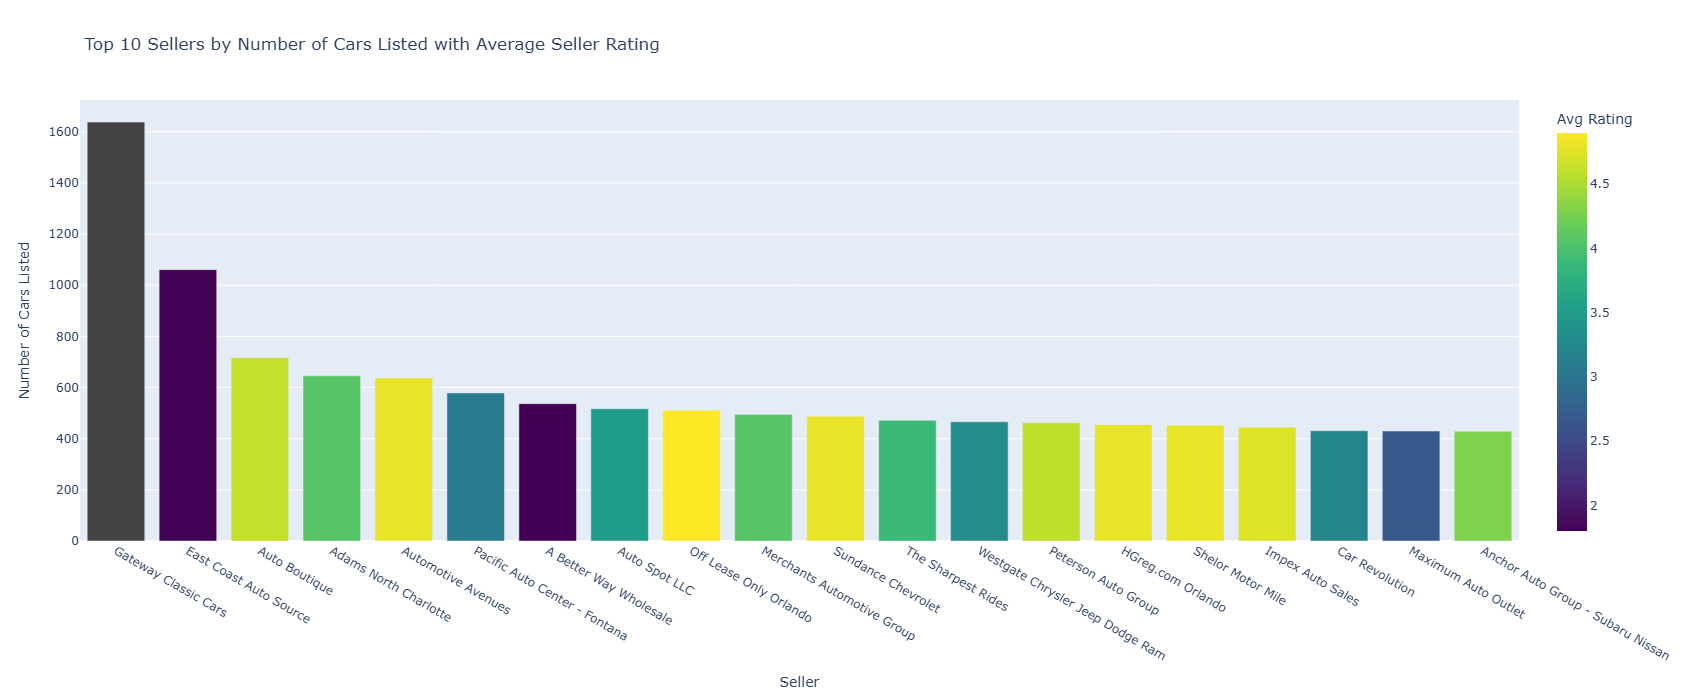

In [371]:
total_listings = data['seller_name'].value_counts()

average_ratings = (data[data['seller_rating'].notnull()].groupby('seller_name').agg({'seller_rating': 'mean'}))

combined = pd.DataFrame({'total_listings': total_listings}).join(average_ratings)

combined['seller_rating'] = combined['seller_rating'].round(2)

combined_sorted = combined.sort_values(by='total_listings', ascending=False)


top_seller = combined_sorted.head(20).reset_index()

fig = px.bar(
    top_seller,
    x='seller_name',
    y='total_listings',
    color='seller_rating',
    color_continuous_scale='Viridis',
    labels={'seller_name': 'Seller', 'total_listings': 'Number of Cars Listed', 'seller_rating': 'Average Rating'},
    title='Top 10 Sellers by Number of Cars Listed with Average Seller Rating',
)
fig.update_layout(
    height = 700,
    width = 1500,
    showlegend = False
)
fig.update_layout(coloraxis_colorbar=dict(title="Avg Rating"))

fig.show()


In [ ]:
Dodge_data = data[data['manufacturer'] == 'Dodge']

In [164]:
Dodge_data['model']

165030              Aspen
165031         Caravan SE
165032        Caravan SXT
165033      Caravan Cargo
165034         Caravan SE
               ...       
190275    Durango GT Plus
190276        Durango R/T
190277    Durango Limited
190278        Durango SXT
190279         Durango GT
Name: model, Length: 25250, dtype: object

In [109]:
tesla_data = data[data['manufacturer'] == 'Tesla']
tesla_data.count()

manufacturer           5883
model                  5883
year                   5883
mileage                5883
engine                 5847
transmission           5883
drivetrain             5883
fuel_type              5873
mpg                       0
accidents_or_damage    5359
one_owner              5347
personal_use_only      5359
seller_rating          4206
driver_rating          5517
driver_reviews_num     5883
price_drop             3463
price                  5883
price_drop_pct         3463
dtype: int64

In [342]:
Gateway_Classic_Cars_data = data[data['seller_name']=='Gateway Classic Cars']
Gateway_Classic_Cars_data

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,age,top_sellers
11288,Audi,Q7 3.0T Premium,2017,97123.0,V6 Cylinder Engine,8spd automatic,AWD,Gasoline,22.0,1.0,0.0,1.0,Gateway Classic Cars,NaN,4.7,72.0,4000.0,42000.0,7,NaN
17208,Audi,TT 2.0T,2014,60209.0,"2L I-4 gasoline direct injection, DOHC, variab...",Automatic,AWD,Gasoline,26.5,0.0,0.0,1.0,Gateway Classic Cars,NaN,4.1,6.0,6000.0,35000.0,10,NaN
22985,Audi,S6 5.2 Prestige,2011,33380.0,"5.2L V-10 gasoline direct injection, DOHC, var...",Automatic,AWD,Gasoline,16.5,0.0,0.0,1.0,Gateway Classic Cars,NaN,5.0,1.0,1000.0,35000.0,13,NaN
27022,BMW,650 650Ci,2006,69104.0,"4.8L V-8 DOHC, Double VANOS variable valve con...",6 Speed Automatic,RWD,Gasoline,18.0,0.0,0.0,0.0,Gateway Classic Cars,NaN,4.7,19.0,NaN,14500.0,18,NaN
28226,BMW,M6 Base,1988,89091.0,3.5L F DOHC I6,5 Speed Manual,Unknown,NaN,NaN,0.0,0.0,1.0,Gateway Classic Cars,NaN,NaN,0.0,6000.0,70000.0,36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741540,Volkswagen,Karmann Ghia,1971,81097.0,4 Cyl 1600 cc,4-speed Manual,Unknown,NaN,NaN,0.0,NaN,1.0,Gateway Classic Cars,NaN,4.4,3.0,NaN,33000.0,53,NaN
741542,Volkswagen,Karmann Ghia,1971,29000.0,Electric,4-Spd Manual,Unknown,NaN,NaN,0.0,NaN,1.0,Gateway Classic Cars,NaN,4.4,3.0,1000.0,62000.0,53,NaN
755336,Volvo,240 DL,1988,120321.0,I-4 B-23,4 Speed Automatic,Unknown,NaN,NaN,NaN,NaN,NaN,Gateway Classic Cars,NaN,4.6,1.0,NaN,11500.0,36,NaN
755337,Volvo,240,1992,138802.0,2.3L I-4 engine with 114HP,Automatic,Unknown,Gasoline,24.5,0.0,0.0,1.0,Gateway Classic Cars,NaN,4.4,4.0,5000.0,16500.0,32,NaN
